In [18]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample Corpus
Each row is a sentence or a complete document.

In [17]:
docs = np.array([
    "ok",
    "not ok"
])

labels = np.array(["positive", "negative"])
docs

array(['ok', 'not ok'], dtype='<U6')

In [19]:
counts = CountVectorizer()
counts.fit(docs)
model = counts.transform(docs)

df = pd.DataFrame(model.toarray(), columns=counts.get_feature_names_out())
# sentence 0 only contains ok, sentence 1 contains not ok
df

,not,ok
0,0,1
1,1,1


Let's display this as two vectors in 2-D space where the sentiment is the color.

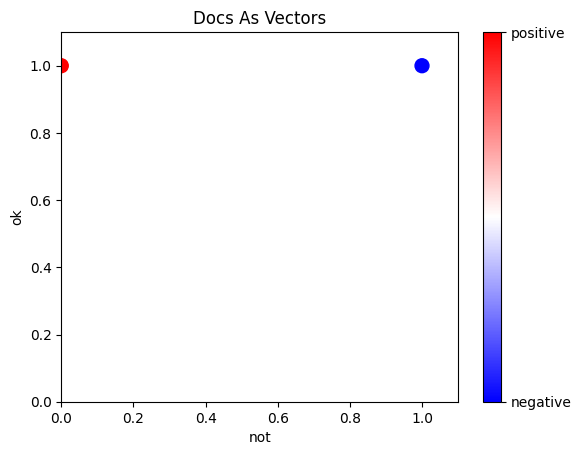

In [30]:
import matplotlib.pyplot as plt
# choose two columns for x and y (the term counts)
cols = df.columns
x = df[cols[0]].values
y = df[cols[1]].values
# map textual labels to numeric sentiment on z axis (used for color)
z = np.where(labels == "positive", 1, -1)
fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=z, cmap='bwr', s=100)
ax.set_xlabel(cols[0])
ax.set_ylabel(cols[1])
# set both axes to range 0 - 1.1
ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)
cbar = plt.colorbar(sc, ax=ax, ticks=[-1, 1])
cbar.set_ticklabels(['negative', 'positive'])
plt.title('Docs As Vectors')
plt.show()

Let's train an SVM and then display the decision boundary on the same chart

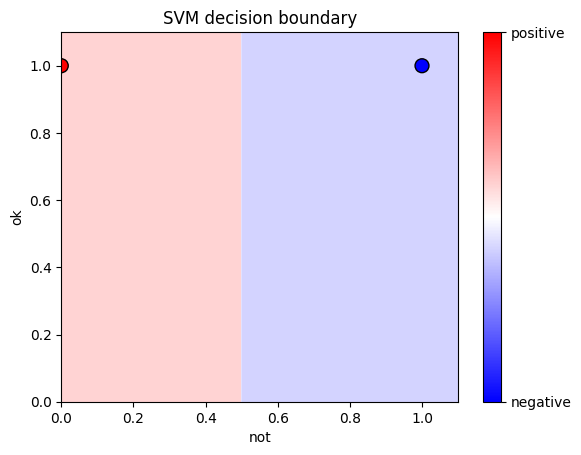

In [ ]:
from sklearn.svm import SVC
# prepare training data using the same two features
X = df[[cols[0], cols[1]]].values
# binary labels for SVM (0 negative, 1 positive)
y_svm = np.where(labels == "positive", 1, 0)
# train a linear SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X, y_svm)

# The rest of this is just drawing the figure, you don't need to worry about the details
# create a meshgrid over the same axis limits
xx, yy = np.meshgrid(np.linspace(0, 1.1, 300), np.linspace(0, 1.1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svm.predict(grid).reshape(xx.shape)
# plot decision boundary background and the points on top
fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
sc = ax.scatter(X[:,0], X[:,1], c=np.where(y_svm==1, 1, -1), cmap='bwr', s=100, edgecolor='k')
ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)
ax.set_xlabel(cols[0])
ax.set_ylabel(cols[1])
cbar = plt.colorbar(sc, ax=ax, ticks=[-1, 1])
cbar.set_ticklabels(['negative', 'positive'])
plt.title('SVM decision boundary')
plt.show()

Let's plot a new sentence on our decision boundary and see what happens.

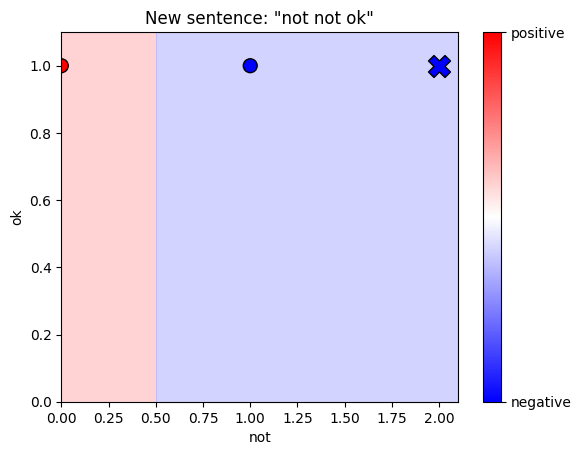

In [ ]:
# vectorize the new sentence and plot it on a matching chart
new_doc = "not not ok"
vec = counts.transform([new_doc]).toarray()
feat_names = counts.get_feature_names_out().tolist()
cols = df.columns
i0 = feat_names.index(cols[0]) if cols[0] in feat_names else 0
i1 = feat_names.index(cols[1]) if cols[1] in feat_names else 1
x_new = vec[0, i0]
y_new = vec[0, i1]
X_new = np.array([[x_new, y_new]])
# predict with the trained SVM if available
pred = svm.predict(X_new)[0]
# draw chart matching previous style and limits
fig, ax = plt.subplots()
try:
    xx, yy = np.meshgrid(np.linspace(0, 2.1, 300), np.linspace(0, 1.1, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = svm.predict(grid).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
except Exception:
    pass
ax.scatter(X[:,0], X[:,1], c=np.where(y_svm==1, 1, -1), cmap='bwr', s=100, edgecolor='k')
ax.scatter([x_new], [y_new], c=np.where(pred==1, 1, -1), cmap='bwr', s=250, marker='X', edgecolor='k')
ax.set_xlim(0, 2.1)
ax.set_ylim(0, 1.1)
ax.set_xlabel(cols[0])
ax.set_ylabel(cols[1])
sm = plt.cm.ScalarMappable(cmap='bwr')
sm.set_clim(-1, 1)
cbar = plt.colorbar(sm, ax=ax, ticks=[-1, 1])
cbar.set_ticklabels(['negative', 'positive'])
plt.title('New sentence: "not not ok"')
plt.show()

What kind of changes would we have to make to get the model to predict that "not not ok" is a positive sentiment?